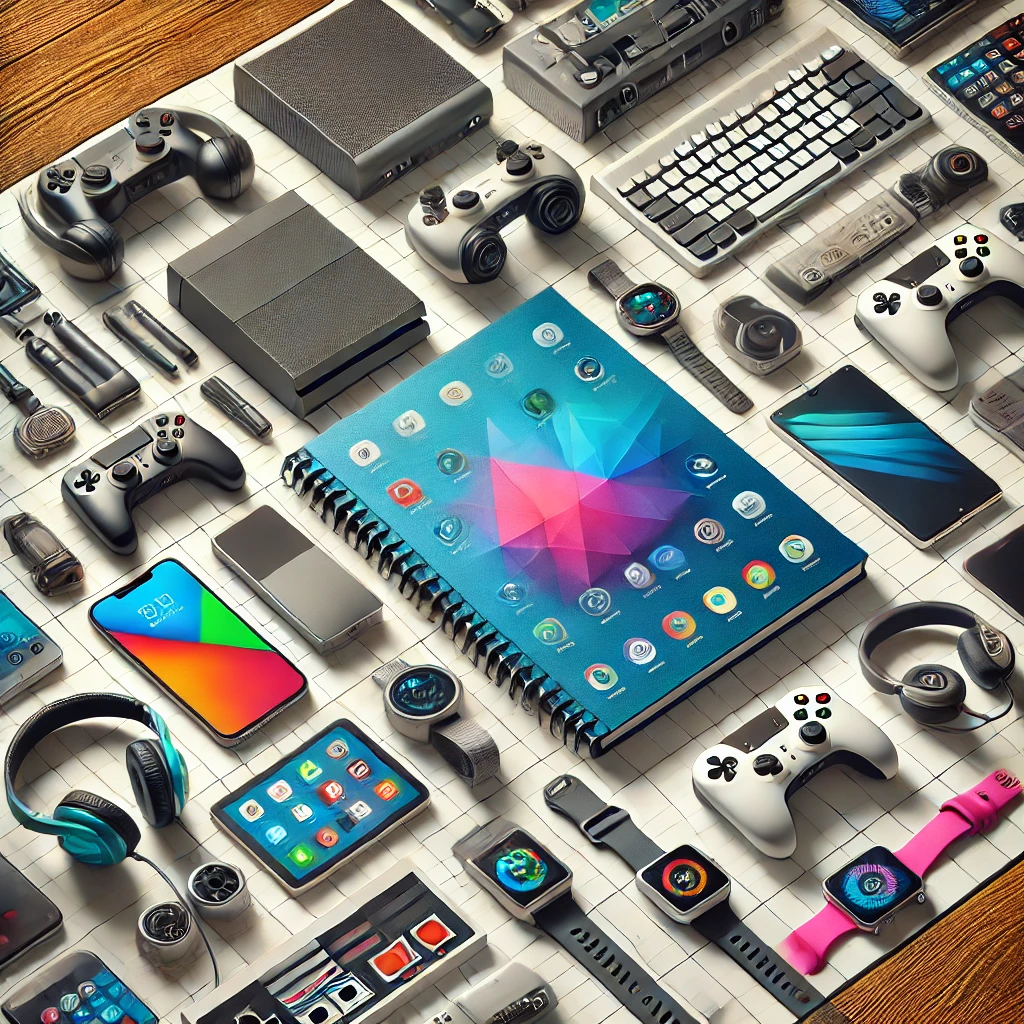

In [4]:
from IPython.display import Image
Image(filename='tech.png', width=400, height=300)

In [5]:
# Sales Data EDA Notebook
# Satış Verileri EDA Not Defteri

In [6]:
# Importing libraries
# Kütüphaneleri içe aktarma
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px
import folium
from folium import plugins

plt.rcParams["figure.figsize"] = (6,4)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
# Load the dataset
# Veri kümesini yükleyin
df=pd.read_csv("sales_data.csv",encoding='windows-1252') # we named my sale data as df

In [8]:
# Display the first few rows of the dataset
# Veri kümesinin ilk birkaç satırını görüntüleyin
df.head()  

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,Salesperson,Region
0,ORD00076,PRD991,"Smartwatch, Camera, Headphones",154.88971109205679,8,0.15,CUST7975,2022-03-31 00:00:00,NaN,North
1,ORD00491,PRD400,Laptop,free,19,0.20,CUST6889,2021-01-06 00:00:00,Charlie,North
2,ORD00369,PRD957,Camera,770.6350827794904,16,0.05,CUST4092,Unknown,Alice,West
3,ORD00490,PRD232,NaN,82.95197721398569,1,0.15,CUST2238,2023-08-14 00:00:00,Charlie,North
4,ORD00228,PRD123,Laptop,250.42946041877397,11,0.20,CUST8442,2020-08-15 00:00:00,Evan,North


In [9]:
# cell names in the data set were checked
# veri setindeki hücre adları kontrol edildi
df.columns 

Index(['OrderID', 'ProductID', 'ProductName', 'UnitPrice', 'Quantity',
       'Discount', 'CustomerID', 'SaleDate', 'Salesperson', 'Region'],
      dtype='object')

In [10]:
# Cell data types were checked in the data set. It was determined that the data type in Unitprice was object when it should be float.
# Veri setinde hücre veri tipleri kontrol edildi. Unitprice içerisindeki veri tipinin float olması gerekirken object olduğu tespit edildi.
df.dtypes 

OrderID         object
ProductID       object
ProductName     object
UnitPrice       object
Quantity         int64
Discount       float64
CustomerID      object
SaleDate        object
Salesperson     object
Region          object
dtype: object

In [11]:
#The values in unıtprice are converted to float with pd.to_numeric command and the empty values are filled as NAN.
#unıtprice içindeki değerler pd.to_numeric komutu ile float'a çevrilir ve boş değerler NAN olarak doldurulur.
df["UnitPrice"]=pd.to_numeric(df["UnitPrice"],errors="coerce")

In [12]:
# To fill the NAN values in Unitprice, unitprice values were averaged.
# Unitprice'daki NAN değerlerini doldurmak için birim fiyat değerlerinin ortalaması alınmıştır.
unıtprice_mean=df["UnitPrice"].mean() 
unıtprice_mean

774.9589432515411

In [13]:
# UnitPrice nan values were filled with Unit price ort values with fillna command.
# UnitPrice nan değerleri fillna komutu ile Birim fiyat ort değerleri ile dolduruldu.
df["UnitPrice"].fillna(unıtprice_mean, inplace=True) 

In [14]:
# duplicate command was used to detect the number of repeated lines in the data.
# Verilerdeki tekrarlanan satır sayısını tespit etmek için  duplicate komutu kullanılmıştır.
df.duplicated().sum()

15

In [15]:
# Repeating values deleted.
# Tekrar eden değerler silindi.
df=df.drop_duplicates()

In [16]:
# Because we deleted the repeating lines, there were gaps between index numbers.Repeat index numbers was created and the old index numbers were ->
# deleted with the drop=true command.
# Tekrar eden satırları sildiğimiz için indeks numaraları arasında boşluklar vardı.Tekrar indeks numaraları oluşturuldu ve eski indeks numaraları ->
# drop=true komutu ile silinir.
df.reset_index(inplace=True,drop=True) 

In [17]:
# UnitPrice values are too long in decimal, so only 2 digits are taken for the part after the comma.
# UnitPrice değerleri ondalık olarak çok uzundur, bu nedenle virgülden sonraki kısım için yalnızca 2 basamak alınır.
df["UnitPrice"]=df["UnitPrice"].round(2) 

In [138]:
# Removed the time from the date-time in the SaleDate cell
# SaleDate hücresindeki tarih-saatten saat kısmı kaldırdı
df["SaleDate"]=pd.to_datetime(df["SaleDate"],errors="coerce") 

In [19]:
# I wanted to make a list of products here and determine which product was sold the most.
# burada ürünlerin listesini yapıp en çok hangi ürün satılmış tespiti yapmak istedim.
df["ProductName"]=df["ProductName"].str.split(",") 

In [20]:
# We tried to pull each product on a single line.
# Herbir ürünün tek bir satıra çekmeye çalıştık.
urun=df.explode('ProductName') 

In [21]:
# we created a name-quantity list of products.
# urunlerin isim-adet listesini oluşturduk.
urun_adet=urun['ProductName'].value_counts() 

In [22]:
# With this printout I have identified spelling mistakes and gaps left before writing the product.
# Almış olduğumu bu çıktı ile yazım hatalarını ve ürün yazmadan önce bırakılan boşlukları tespit ettik.
urun_adet 

ProductName
Camera         109
Laptop          97
Headphones      85
Smartphone      84
Smartwatch      76
 Camera         55
 Smartphone     52
 Headphones     49
 Laptop         48
 Smartwatch     46
Headphons        8
Laptpo           6
Smartwach        5
Camra            3
Smratphone       3
Name: count, dtype: int64

In [23]:
urun['ProductName']=urun['ProductName'].str.replace('Smratphone','Smartphone')

In [24]:
urun['ProductName']=urun['ProductName'].str.replace(' Smartphone','Smartphone')

In [25]:
urun['ProductName']=urun['ProductName'].str.replace('Camra','Camera')

In [26]:
urun['ProductName']=urun['ProductName'].str.replace(' Camera','Camera')

In [27]:
urun['ProductName']=urun['ProductName'].str.replace('Smartwach','Smartwatch')

In [28]:
urun['ProductName']=urun['ProductName'].str.replace(' Smartwatch','Smartwatch')

In [29]:
urun['ProductName']=urun['ProductName'].str.replace('Laptpo','Laptop')

In [30]:
urun['ProductName']=urun['ProductName'].str.replace(' Laptop','Laptop')

In [31]:
urun['ProductName']=urun['ProductName'].str.replace(' Headphones','Headphones')

In [32]:
urun['ProductName']=urun['ProductName'].str.replace('Headphons','Headphones')

In [33]:
urun_adet=urun['ProductName'].value_counts()

In [34]:
# OrderID hataların tespit edilmesi ayılanması ve düzeltilmesi işlemleri yapıldı.
# OrderID errors were detected, debugged and corrected.

In [35]:
(df["OrderID"].str.len()==9).value_counts()

OrderID
False    485
True      25
Name: count, dtype: int64

In [36]:
df["OrderID"]=df["OrderID"].str.replace("#","")

In [37]:
df["OrderID"]=df["OrderID"].str.replace("!","")

In [38]:
df["OrderID"]=df["OrderID"].str.replace("*","")

In [39]:
(df["OrderID"].str.len()==9).value_counts()

OrderID
False    510
Name: count, dtype: int64

In [40]:
# ProductID hataların tespit edilmesi ayılanması ve düzeltilmesi işlemleri yapıldı.
# ProductID errors were detected, debugged and corrected.

In [41]:
(df["ProductID"].str.len()==7).value_counts()

ProductID
False    485
True      25
Name: count, dtype: int64

In [42]:
df["ProductID"]=df["ProductID"].str.replace("#","")

In [43]:
df["ProductID"]=df["ProductID"].str.replace("*","")

In [44]:
df["ProductID"]=df["ProductID"].str.replace("!","")

In [45]:
(df["ProductID"].str.len()==7).value_counts()

ProductID
False    510
Name: count, dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderID      510 non-null    object        
 1   ProductID    510 non-null    object        
 2   ProductName  476 non-null    object        
 3   UnitPrice    510 non-null    float64       
 4   Quantity     510 non-null    int64         
 5   Discount     510 non-null    float64       
 6   CustomerID   458 non-null    object        
 7   SaleDate     485 non-null    datetime64[ns]
 8   Salesperson  459 non-null    object        
 9   Region       510 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 40.0+ KB


In [47]:
df['ProductName']=df['ProductName'].fillna('Unknown')

In [48]:
df['CustomerID']=df['CustomerID'].fillna('Unknown')

In [49]:
df['SaleDate']= df['SaleDate'].fillna('Unknown')

In [50]:
df['Salesperson']=df['Salesperson'].fillna('Unknowm')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OrderID      510 non-null    object 
 1   ProductID    510 non-null    object 
 2   ProductName  510 non-null    object 
 3   UnitPrice    510 non-null    float64
 4   Quantity     510 non-null    int64  
 5   Discount     510 non-null    float64
 6   CustomerID   510 non-null    object 
 7   SaleDate     510 non-null    object 
 8   Salesperson  510 non-null    object 
 9   Region       510 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 40.0+ KB


In [52]:
#Sales person içersinde isimler ile alakalı yazım hataları tespit edildi.
df['Salesperson'].value_counts()

Salesperson
Diana      96
Alice      93
Charlie    85
Bob        81
Evan       79
Unknowm    51
Ailce       8
Daina       7
Eavn        5
Bbo         4
Chalrie     1
Name: count, dtype: int64

In [53]:
#Aşağıda mevcut yazım hataları düzeltildi.

In [54]:
df['Salesperson']=df['Salesperson'].replace('Ailce','Alice')

In [55]:
df['Salesperson']=df['Salesperson'].replace('Daina','Diana')

In [56]:
df['Salesperson']=df['Salesperson'].replace('Eavn','Evan')

In [57]:
df['Salesperson']=df['Salesperson'].replace('Bbo','Bob')

In [58]:
df['Salesperson']=df['Salesperson'].replace('Chalrie','Charlie')

In [59]:
df['Salesperson'].value_counts()

Salesperson
Diana      103
Alice      101
Charlie     86
Bob         85
Evan        84
Unknowm     51
Name: count, dtype: int64

# Grafiksel Analiz ve Çıkarımlar(Graphical Analysis and Inferences)

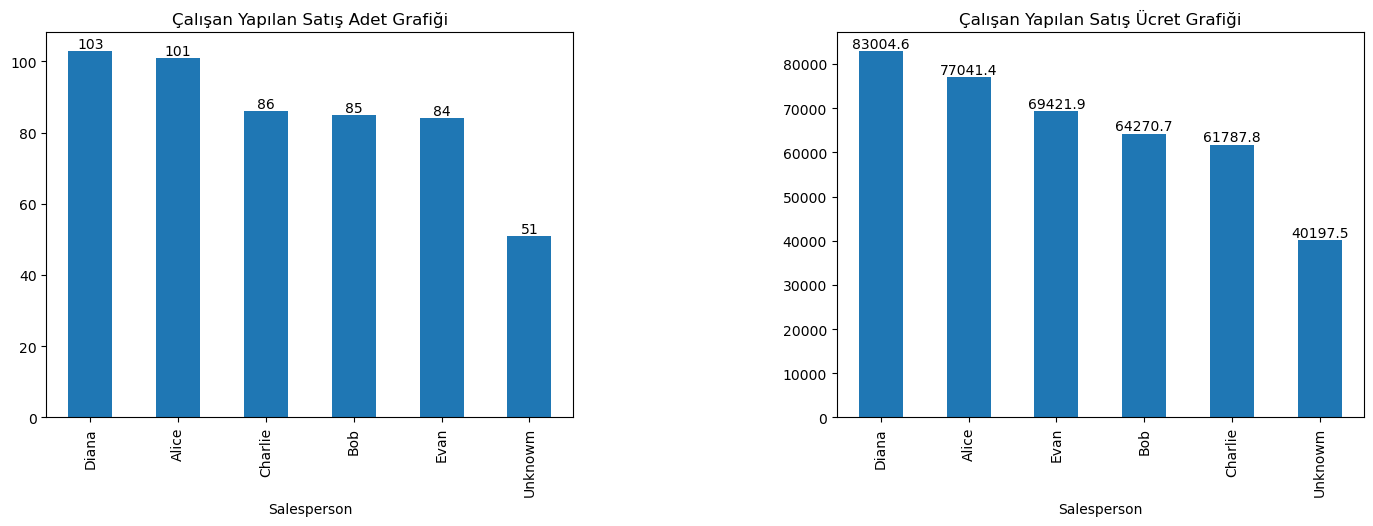

In [61]:
#Bu grafikle en fazla satış yapan personel  bilgilerini görselleştirdik.
#With this graph, we visualized the information of the personnel who made the most sales.
fig, ax = plt.subplots(1, 2, figsize=(17, 5))
ax1=df['Salesperson'].value_counts().sort_values(ascending=False).plot(kind='bar', ax=ax[0])
ax[0].set_title('Çalışan Yapılan Satış Adet Grafiği')
for p in ax1.containers: 
 ax1.bar_label(p)
ax2=df.groupby('Salesperson')['UnitPrice'].sum().sort_values(ascending=False).plot(kind='bar',ax=ax[1])
ax[1].set_title("Çalışan Yapılan Satış Ücret Grafiği")
for p in ax2.containers: 
 ax2.bar_label(p)
plt.subplots_adjust(wspace=0.5)

# Gelin yukarıdaki iki grafiği bir değerlendirelim(Let's evaluate the two graphs above):
1-Diana 103 adet ürün satarak en fazla satış yapan personel olmuş ve bunu yanında yapılan satışlar ile elede edilen gelir grafiğinde  de Diana doğru orantılı olarak en fazla kazanç sağlayan personel olmuştur.

2-Charlie ile alakalı graifte ters orantılı bir durum söz konusu.Charlie 'Çalışan Yapılan Satış Adet Grafiği' ne bakıldığında  86 adet satarak üçüncü sırada yer almış ancak elde edilen kazanç noktasında beşinci sırada yer almış.Charlie'nin daha yüksek fiyatlı ürünler satmaya odaklanması kazancını artırabilir. Eğitim veya yönlendirme ile satış stratejisinin değişmesi, daha yüksek kârlılık getirebilir.

3.Evan yaptıığı ürün satış adet sıralamasında beşinci sırada yer almakta sağladığı kazanç noktasında üçüncü sırada yer almakta.Evan  burada uyguladığı satış stratejisi işletmede tarafında örnek rol model olabilir çünkü katma değerli satış stratejisi bir işletmeye her zaman fayda sağlar.Evan’ın durumu, daha az satış yapmanın kazanç sıralamasında geride kalmak anlamına gelmediğini, önemli olanın yüksek kârlı ürünleri satma becerisi olduğunu gösteriyor.
+++++++++++
1-Diana was the employee who made the most sales by selling 103 products, and in the graph of sales made and income generated, Diana was the employee who earned the most in direct proportion.

2-Charlie has an inverse proportion in the graph related to Charlie. Charlie ranked third in the 'Employee Sales Chart' by selling 86 units, but ranked fifth in terms of earnings. Charlie's focus on selling higher priced products can increase his earnings. Changing his sales strategy with training or guidance can lead to higher profitability.

3.Evan ranks fifth in terms of the number of product sales but third in terms of earnings.Evan's sales strategy here can be a role model for the business because a value-added sales strategy always benefits a business.Evan's case shows that selling less does not mean falling behind in the earnings ranking, it is the ability to sell high-profit products that matters.

In [278]:
bolgede_calisan_sayisi=df.groupby('Region')['Salesperson'].count().sort_values(ascending=False)
bolgede_calisan_sayisi

Region
East       111
South      110
West       107
North       92
Central     90
Name: Salesperson, dtype: int64

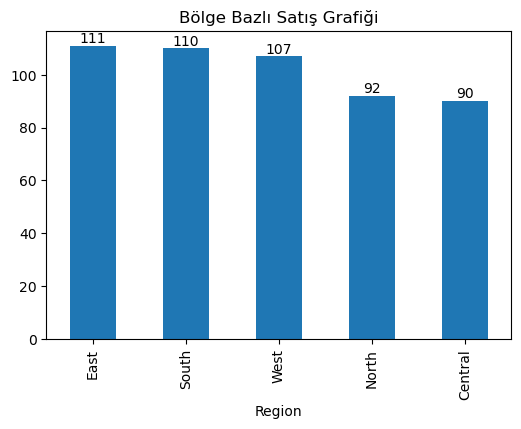

In [280]:
ax=bolgede_calisan_sayisi.sort_values(ascending=False).plot(kind='bar')
for p in ax.containers: 
 ax.bar_label(p)
plt.title('Bölge Bazlı Satış Grafiği');

# Bölgesel bazlı satış grafiği analizi(Regional based sales graph analysis):
1-East,South ve West bölgeleri için satış değerleri bir birine yakın dolayısıyla bu değerleri normal saydığımızda North ve Cenral bölgeleri satış değerlerini anormal olarak değerlendirip bu iki bölge için  müşteri geri bildirimlerini ,pazar analizlerini incelemek ve pazarlama stratejisi  tekrar gözden geçirmek faydalı olacaktır.
+++++++++
1-East, South and West regions sales values are close to each other, so when we consider these values as normal, it would be useful to consider the sales values of North and Cenral regions as abnormal and examine customer feedback, market analysis and marketing strategy for these two regions.


In [68]:
# Data içerisinde her ürün için satışı yapılan miktarlar.
# Quantities sold for each product in the data.
urun_adet 

ProductName
Camera        167
Laptop        151
Headphones    142
Smartphone    139
Smartwatch    127
Name: count, dtype: int64

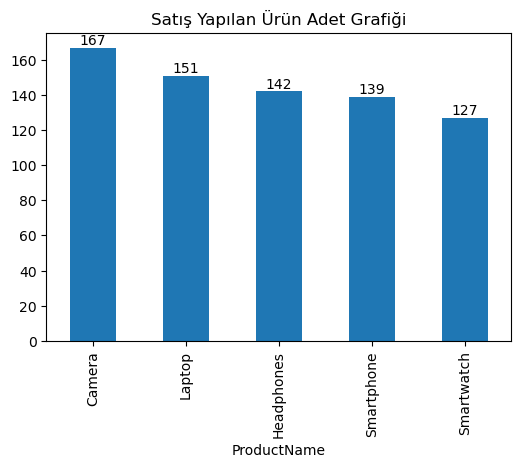

In [69]:
# Bu grafikle en çok satışı yapılan ürün grafiği çizimi yaptık.
# With this graph, we drew the graph of the most sold product.
ax=urun_adet.plot(kind= 'bar')
ax.set_title('Satış Yapılan Ürün Adet Grafiği')
for p in ax.containers: 
 ax.bar_label(p)

# Satış Yapılan Ürün Adet Grafiği İnceleme(Sales Product Number Graphic Review):
1-En fazla satışı yapılan Camera özelinde uygulanan pazarlama stratejisi örnek alınarak diğer ürünlerede uygulanarak satışların artırılmasına sağlanabilir.
+++++
1-The marketing strategy applied to the Camera, which has the highest number of sales, can be taken as an example and applied to other products to increase sales.